In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import plotly.express as px
import scipy.stats as stats

In [4]:
data = pd.read_csv(r'C:\Users\Mannahil Miftah\Downloads\googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Exploring Dataset

In [5]:
data.shape

(10841, 13)

In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
data.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

In [9]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Data Cleaning

In [10]:
#printing values of all attributes to identify if any attribute has ?

allColumns = data.columns
for c in allColumns:
    missed = data[c].isin(['?']).sum()
    if missed > 0:
        print(c, "\t", missed)

##### Analyzing category column

In [11]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
# removing 1.9 value and replacing it with NA(Not Applicable) as 1.9 is incorrect value

data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# replacing the value

data['Category'] = data['Category'].str.replace("1.9","NA")

C:\Users\MANNAH~1\AppData\Local\Temp/ipykernel_15948/1889109757.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Category'] = data['Category'].str.replace("1.9","NA")


##### Analyzing rating column

In [14]:
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [15]:
# changing the data type of reviews from object to numeric

data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Rating'].dtype

dtype('float64')

In [16]:
# As we saw while exploring that rating contains nan values
# replacing nan values with mean of the column

data['Rating'] = data['Rating'].replace(np.nan, np.mean(data['Rating']))

In [17]:
# as we can see that nan values from the column are removed

data[data['Rating'] == np.nan]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


##### Ananlyzing review column

In [18]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [19]:
# checking the record with 3.0M

data[data['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NA,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
# replacing the value

data['Reviews'] = data.Reviews.replace("3.0M",3000000.0)

# changing data type

data['Reviews'] = data.Reviews.astype(float)

##### Analyzing size column

In [21]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [22]:
# removing M, k, 1,000+, 1000+ & Varies with device

data['Size'] = data['Size'].str.replace("M","000")

In [23]:
data['Size'] = data['Size'].str.replace("k","")

In [24]:
data['Size'] = data['Size'].str.replace("1,000+","1000")

C:\Users\MANNAH~1\AppData\Local\Temp/ipykernel_15948/1000057728.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Size'] = data['Size'].str.replace("1,000+","1000")


In [25]:
data['Size'] = data.Size.replace("1000+","1000")

In [26]:
data['Size'] = data['Size'].str.replace("Varies with device","NaN")

In [27]:
# changing the data type of the column

data['Size'] = data['Size'].astype(float)
data['Size'].dtype

dtype('float64')

##### Analyzing installs column

In [28]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [29]:
# removing , + & Free

data['Installs'] = data['Installs'].str.replace(",","")

In [30]:
data['Installs'] = data['Installs'].str.replace("+","")

C:\Users\MANNAH~1\AppData\Local\Temp/ipykernel_15948/480341623.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace("+","")


In [32]:
data['Installs'] = data['Installs'].str.replace("Free","NaN")

In [33]:
# changing the data type of the column

data['Installs'] = data['Installs'].astype(float)
data['Installs'].dtype

dtype('float64')

##### Analyzing Price column

In [34]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [35]:
# removing $ and Everyone

data['Price'] = data['Price'].str.replace("$","")

C:\Users\MANNAH~1\AppData\Local\Temp/ipykernel_15948/1928195240.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace("$","")


In [36]:
data['Price'] = data['Price'].str.replace("Everyone","NaN")

In [37]:
# changing the data type

data['Price'] = data['Price'].astype(float)
data['Price'].dtype

dtype('float64')

##### Analyzing Last Updated & Genres column

In [38]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [39]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [40]:
data[data['Last Updated'] == '1.0.19']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NA,19.0,3000000.0,1000.0,0.0,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [41]:
# replacing the value 1.0.19 to February 11, 2018 which is present in Genres column

data['Last Updated'] = data['Last Updated'].str.replace("1.0.19", data['Genres'][10472])

C:\Users\MANNAH~1\AppData\Local\Temp/ipykernel_15948/3465870206.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Last Updated'] = data['Last Updated'].str.replace("1.0.19", data['Genres'][10472])


In [42]:
data[data['Last Updated'] == '1.0.19']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [43]:
# now changing the value of genre in which date is present to None

data[data['Genres'] == 'February 11, 2018']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NA,19.0,3000000.0,1000.0,0.0,0,NaN,NaN,"February 11, 2018","February 11, 2018",4.0 and up,NaN


In [44]:
data['Genres'] = data['Genres'].str.replace("February 11, 2018", "NaN")

##### Dealing with nan values

In [45]:
data.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size               True
Installs          False
Type               True
Price              True
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [46]:
data.dropna(inplace = True)
data.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

##### Duplicate Values

In [47]:
data.duplicated().any()

True

In [48]:
data.drop_duplicates(inplace = True)

In [49]:
data.shape

(8821, 13)

#### Visualization

##### Top 10 Categories

In [50]:
count = data['Category'].value_counts()
count.head(10)

FAMILY             1803
GAME               1000
TOOLS               737
MEDICAL             380
BUSINESS            379
PERSONALIZATION     352
LIFESTYLE           338
FINANCE             304
PRODUCTIVITY        299
SPORTS              296
Name: Category, dtype: int64

Text(0, 0.5, 'Count')

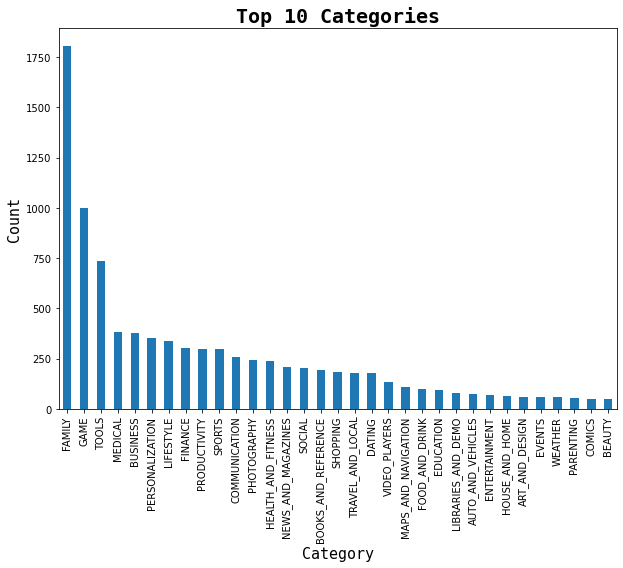

In [51]:
plt.figure(figsize=[10,7])
count.plot(kind = 'bar')
plt.title('Top 10 Categories', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Category', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Count', fontdict={'fontname':'Monospace', 'fontsize': 15,})

Text(0.5, 1.0, 'Pie Chart of top Categories')

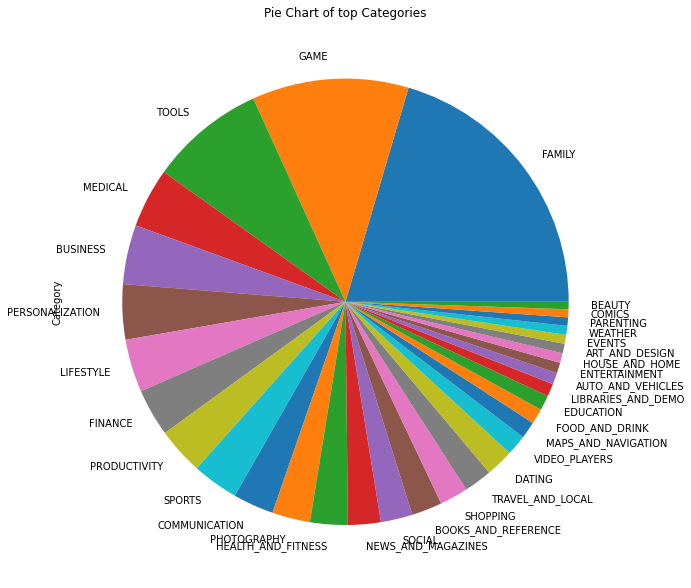

In [52]:
plt.figure(figsize=[10,15])
count.plot(kind='pie')
plt.title("Pie Chart of top Categories")

##### Category wise Reviews

In [53]:
top_10_category = pd.DataFrame(data.groupby('Category')['Reviews'].sum())
top_10_category = top_10_category.sort_values(by = ['Reviews'], ascending = False)
top_10_category = top_10_category.reset_index()
top_10_category.head(10)

,Category,Reviews
0,GAME,1.206725e+09
1,FAMILY,2.884686e+08
2,TOOLS,1.052768e+08
3,COMMUNICATION,8.907720e+07
4,PHOTOGRAPHY,7.172162e+07
5,SPORTS,5.091184e+07
6,PRODUCTIVITY,4.264305e+07
7,SHOPPING,3.951521e+07
8,PERSONALIZATION,3.485290e+07
9,SOCIAL,2.794313e+07


Text(0, 0.5, 'Categories')

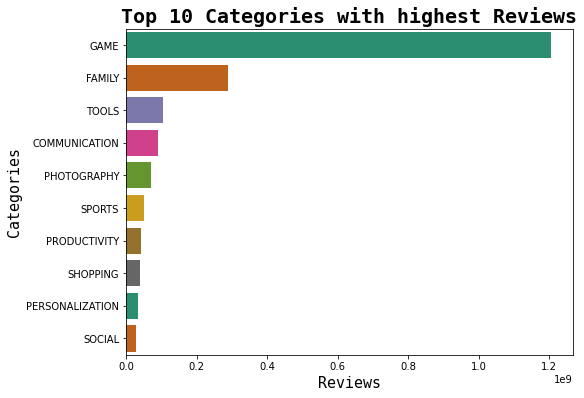

In [54]:
plt.figure(figsize=[8,6])
sb.barplot(data = top_10_category.head(10), x = 'Reviews', y = 'Category', palette = 'Dark2')
plt.title('Top 10 Categories with highest Reviews', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Reviews', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Categories', fontdict={'fontname':'Monospace', 'fontsize': 15,})

##### Catergory wise Ratings

In [55]:
ratings = pd.DataFrame(data.groupby('Category')['Rating'].sum())
ratings = ratings.sort_values(by = ['Rating'], ascending = False)
ratings = ratings.reset_index()
ratings.head(10)

,Category,Rating
0,FAMILY,7554.181061
1,GAME,4262.726871
2,TOOLS,2974.907185
3,MEDICAL,1589.313846
4,BUSINESS,1568.274101
5,PERSONALIZATION,1512.200374
6,LIFESTYLE,1389.966990
7,FINANCE,1252.626871
8,SPORTS,1244.673652
9,PRODUCTIVITY,1241.847005


Text(0, 0.5, 'Categories')

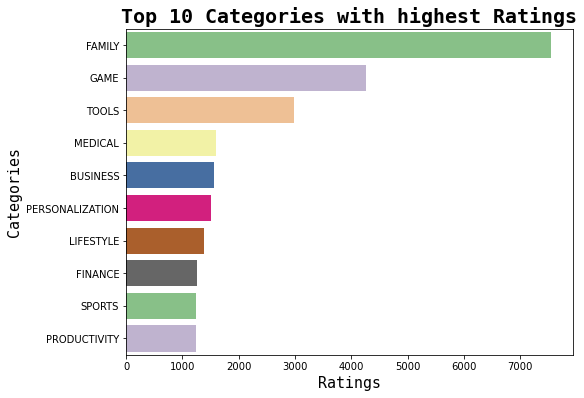

In [56]:
plt.figure(figsize=[8,6])
sb.barplot(data = ratings.head(10), x = 'Rating', y = 'Category', palette = 'Accent')
plt.title('Top 10 Categories with highest Ratings', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Ratings', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Categories', fontdict={'fontname':'Monospace', 'fontsize': 15,})

##### Most Rated Apps

In [57]:
most_rated_app = pd.DataFrame(data.groupby('App')['Rating'].sum())
most_rated_app = most_rated_app.sort_values(by = ['Rating'], ascending = False)
most_rated_app = most_rated_app.reset_index()
most_rated_app.head(10)

,App,Rating
0,ROBLOX,40.5
1,8 Ball Pool,31.5
2,Zombie Catchers,28.2
3,Bubble Shooter,26.9
4,Helix Jump,25.2
5,Granny,22.5
6,Subway Surfers,22.5
7,Farm Heroes Saga,22.0
8,Candy Crush Saga,22.0
9,Angry Birds Classic,22.0


Text(0, 0.5, 'Ratings')

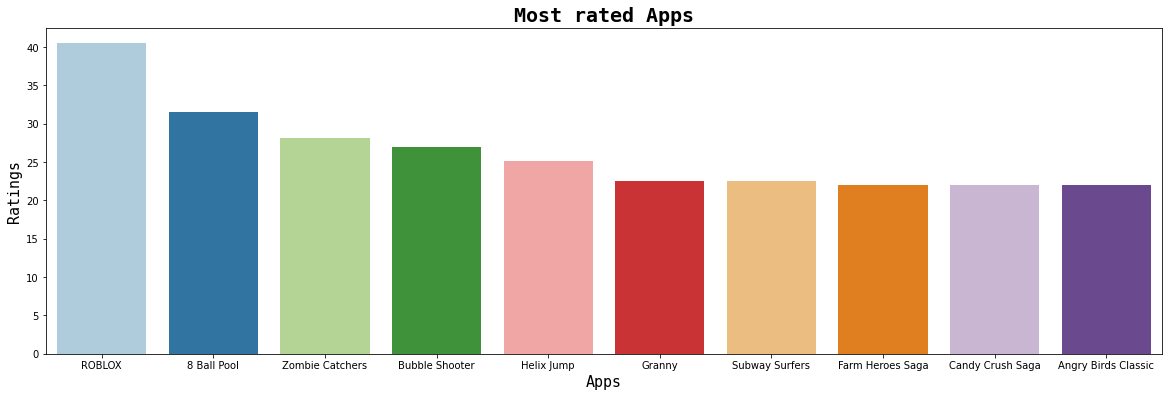

In [58]:
plt.figure(figsize=[20,6])
sb.barplot(data = most_rated_app.head(10), x = 'App', y = 'Rating', palette = 'Paired')
plt.title('Most rated Apps', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Apps', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Ratings', fontdict={'fontname':'Monospace', 'fontsize': 15,})

##### Most reviewed Apps

In [78]:
app = pd.DataFrame(data.groupby('App')['Reviews'].sum())
app = app.sort_values(by = ['Reviews'], ascending = False)
app = app.reset_index()
app.head(10)

,App,Reviews
0,Subway Surfers,138606606.0
1,Clash of Clans,134667058.0
2,Candy Crush Saga,112134492.0
3,8 Ball Pool,99386198.0
4,Clash Royale,92530298.0
5,Pou,41939801.0
6,Temple Run 2,40591993.0
7,ROBLOX,40038379.0
8,My Talking Angela,39523473.0
9,Farm Heroes Saga,38072869.0


Text(0, 0.5, 'Reviews')

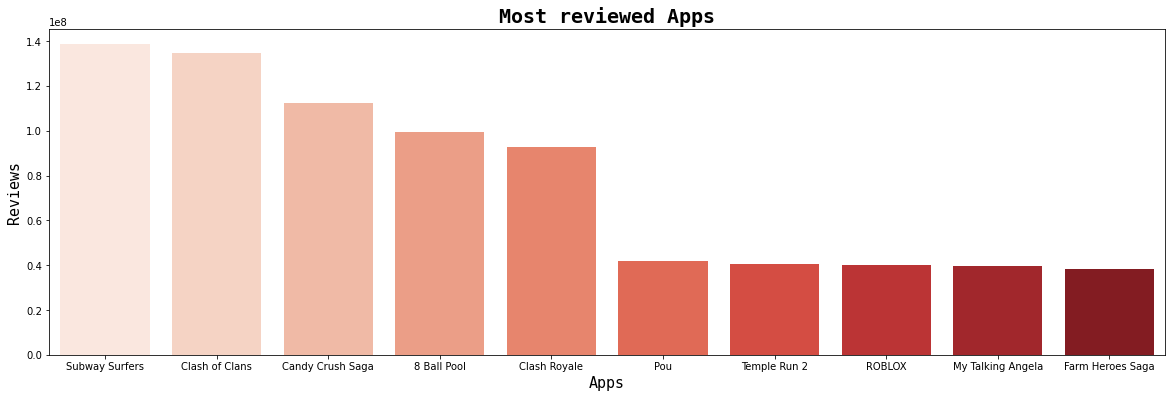

In [81]:
plt.figure(figsize=[20,6])
sb.barplot(data = app.head(10), x = 'App', y = 'Reviews', palette = 'Reds')
plt.title('Most reviewed Apps', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Apps', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Reviews', fontdict={'fontname':'Monospace', 'fontsize': 15,})

##### Most Popular Apps

In [59]:
app_count = data['App'].value_counts()
app_count = app_count.sort_values(ascending = False)
app_count.head(10)

ROBLOX                 9
8 Ball Pool            7
Bubble Shooter         6
Zombie Catchers        6
Helix Jump             6
Candy Crush Saga       5
Temple Run 2           5
Granny                 5
Angry Birds Classic    5
Farm Heroes Saga       5
Name: App, dtype: int64

Text(0, 0.5, 'Count')

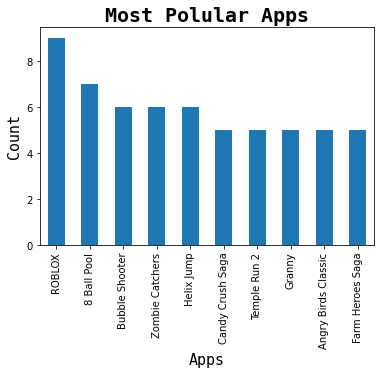

In [60]:
app_count.head(10).plot(kind = 'bar')
plt.title('Most Polular Apps', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Apps', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Count', fontdict={'fontname':'Monospace', 'fontsize': 15,})

##### Distribution between rating and reviews

Text(0, 0.5, 'Reviews')

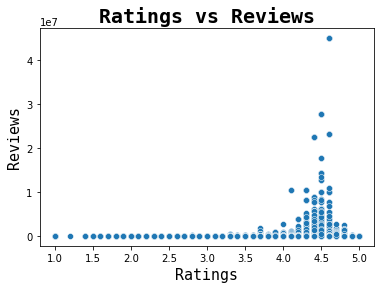

In [83]:
sb.scatterplot(data = data, x ='Rating', y = 'Reviews')
plt.title('Ratings vs Reviews', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Ratings', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Reviews', fontdict={'fontname':'Monospace', 'fontsize': 15,})

#### Correlation

In [61]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.079270,0.073857,0.053150,-0.020093
Reviews,0.079270,1.000000,0.233530,0.633603,-0.009701
Size,0.073857,0.233530,1.000000,0.168328,-0.023576
Installs,0.053150,0.633603,0.168328,1.000000,-0.010290
Price,-0.020093,-0.009701,-0.023576,-0.010290,1.000000


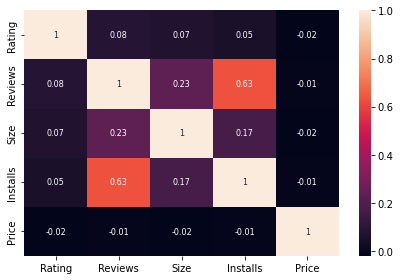

In [62]:
sb.heatmap(data=data.corr().round(2), annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

#### Statistical Analysis

In [63]:
#RATING

mean = np.mean(data['Rating'])
std = np.std(data['Rating'])
print("Mean ", mean)
print("Standard Deviation", std)

Mean  4.174884214539512
Standard Deviation 0.5042251985934665
